# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan merupakan dataset yang direkomendasikan, yaitu

**Customer Personality Analysis**

Dataset ini berisi informasi tentang pelanggan, termasuk demografi, perilaku belanja, dan interaksi produk. Sumber : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2397]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from google.colab import drive
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer




# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2398]:
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/IDCAMP/marketing_campaign.csv',sep='\t')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [2399]:
#Struktur data
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [2400]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2401]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2402]:
#Identifikasi data hilang
df.isna().sum() #Melakukan pengecekan data hilang

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [2403]:
df[df["Income"].isna() ]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


Untuk menangai data hilang tersebut, akan dilakukan pengisian dengan menggunakan rata - rata dari kolom Income. Proses tersebut akan dilakukan pada tahap data preprocessing.

In [2404]:
df.duplicated().sum() #Mengecek data duplikat

0

In [2405]:
df['Age'] = df['Year_Birth'].apply(lambda x: 2024 - x)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,43


In [2406]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,55.194196
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069


In [2407]:
df[df['Age']>100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,124
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,131
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,125


In [2408]:
df[df['Income'] == df['Income'].max()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,3,11,0,47


In [2409]:
df['Total_Purchase'] = df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebPurchases']+df['NumDealsPurchases']
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Purchase
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,55.194196,14.862054
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000,8.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000,15.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000,21.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000,44.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,7.677173


In [2410]:
df['Total_AcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Purchase,Total_AcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,67,25,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,70,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,59,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,40,8,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,43,19,0


In [2411]:
df['Total_Product']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Purchase,Total_AcceptedCmp,Total_Product
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,67,25,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,70,6,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,59,21,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,40,8,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,43,19,0,422


In [2412]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('ID')
numerical_features

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Purchase', 'Total_AcceptedCmp', 'Total_Product'],
      dtype='object')

In [2413]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['Education', 'Marital_Status'], dtype='object')

<ipython-input-2414-414d8394454f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


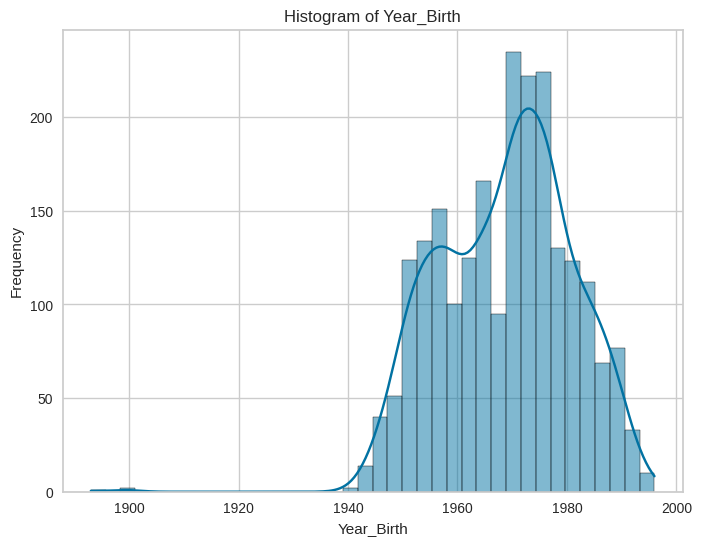

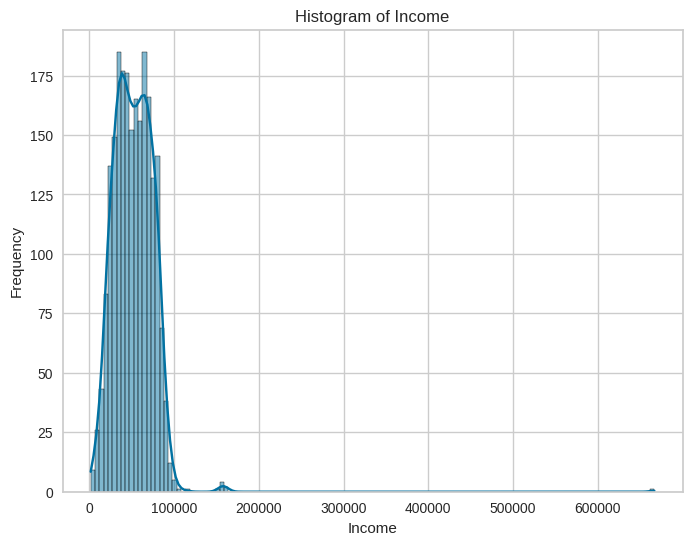

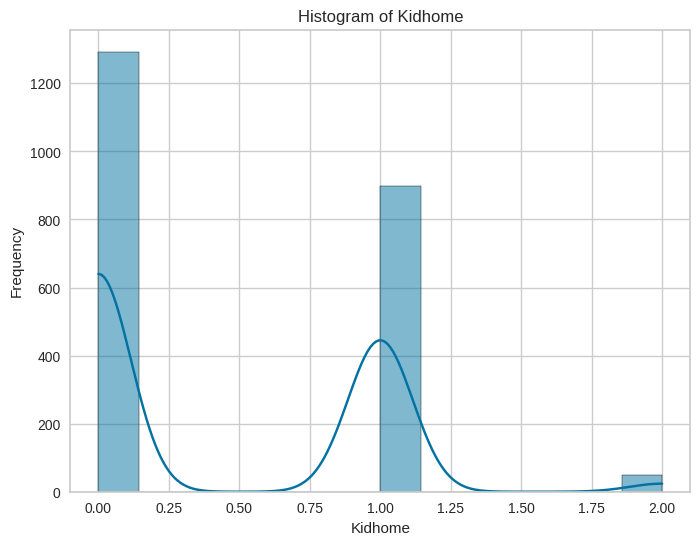

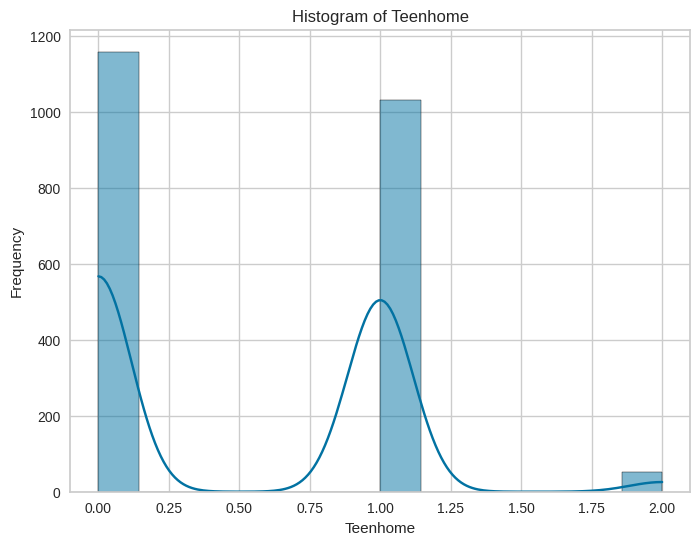

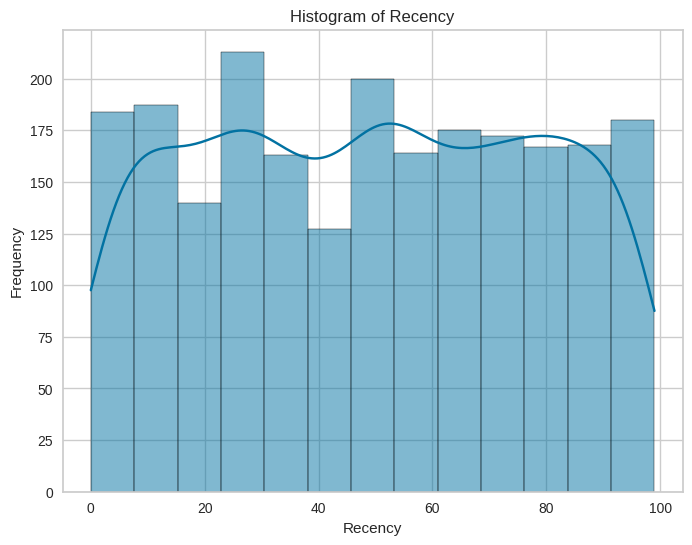

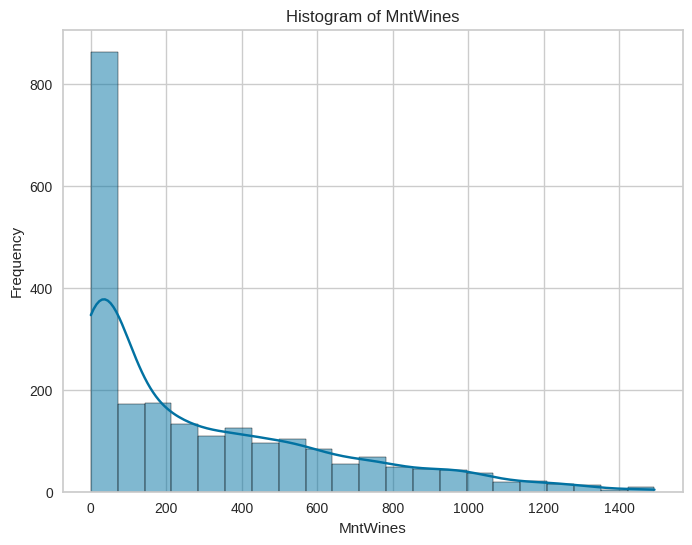

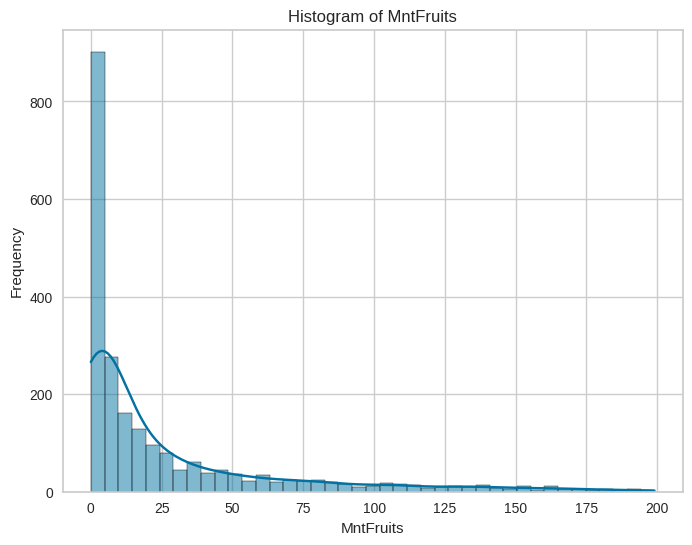

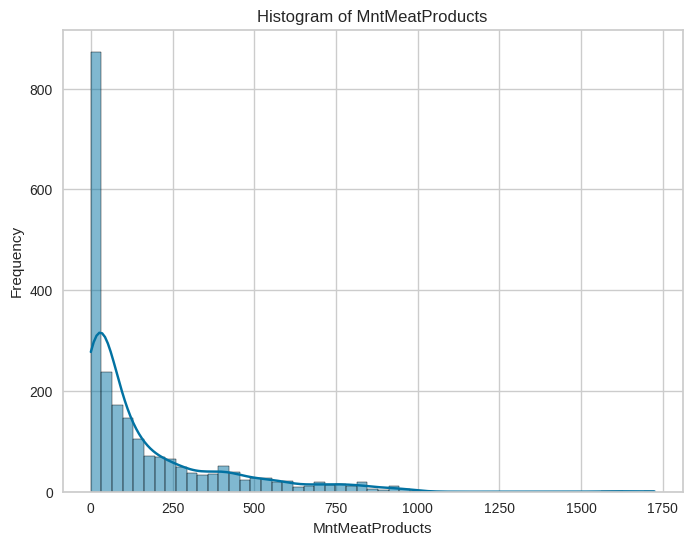

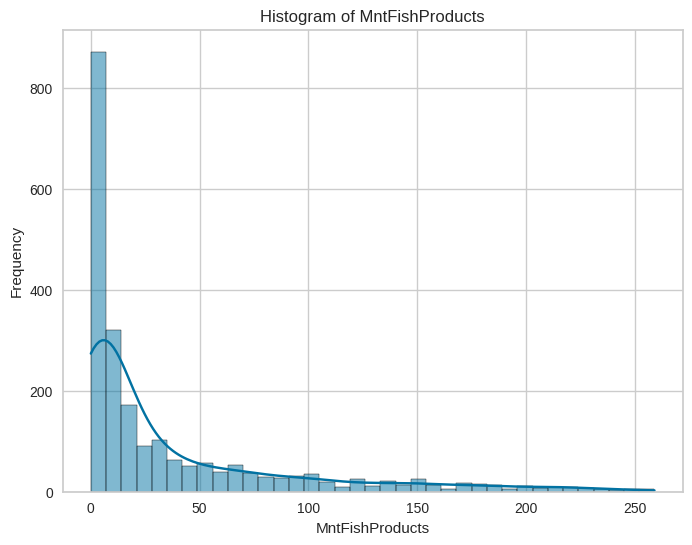

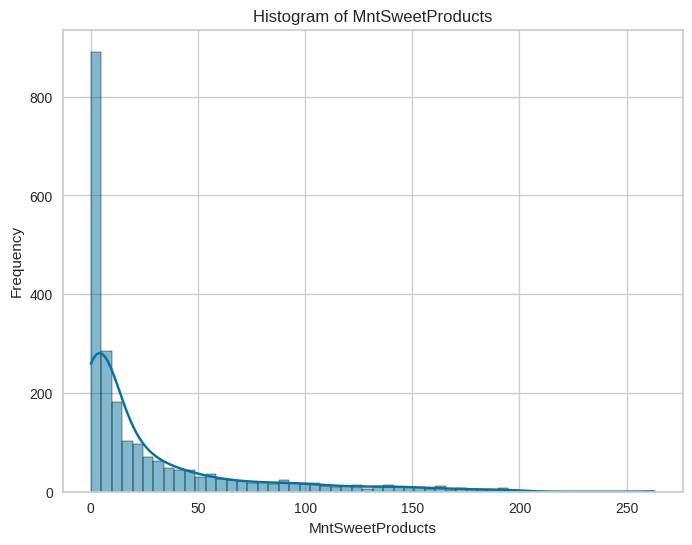

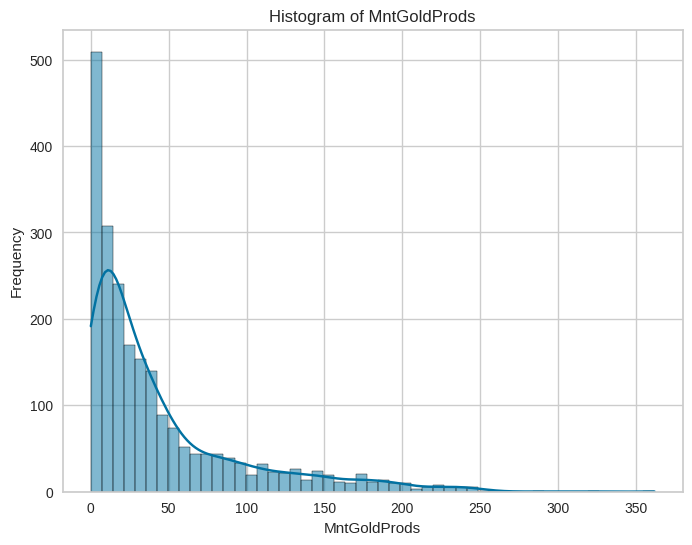

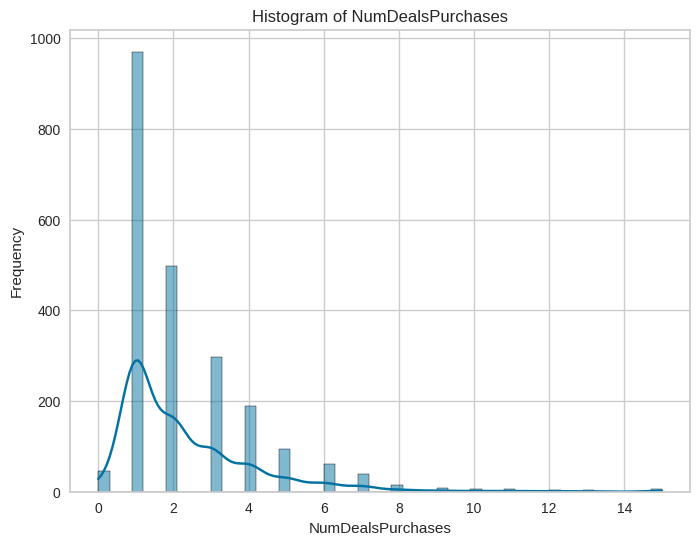

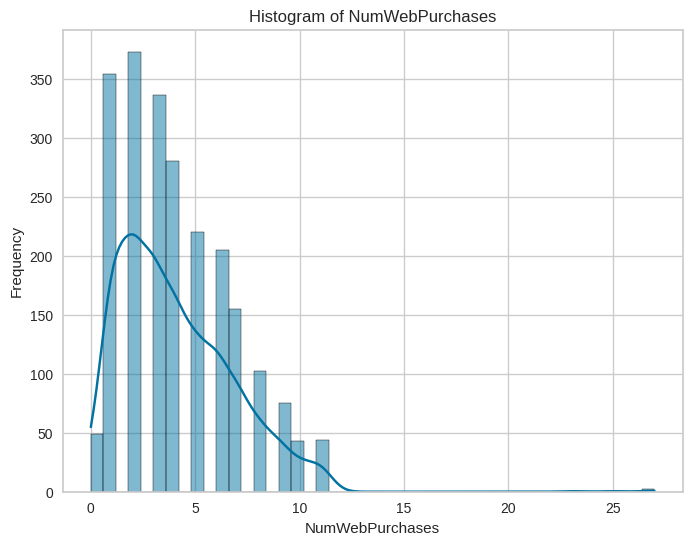

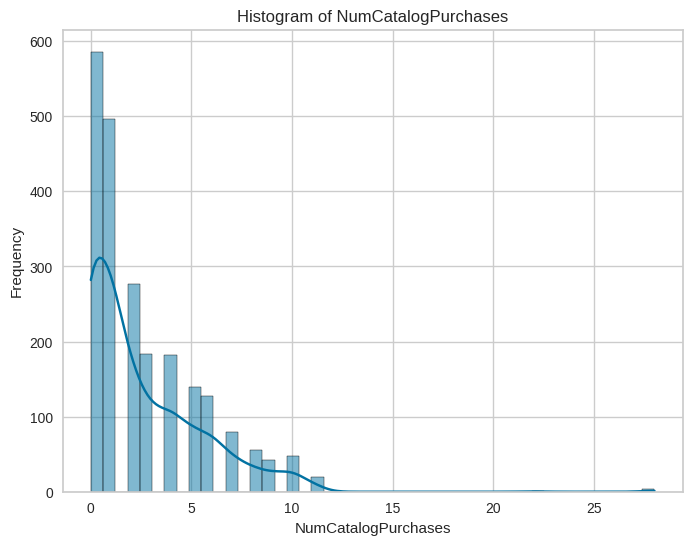

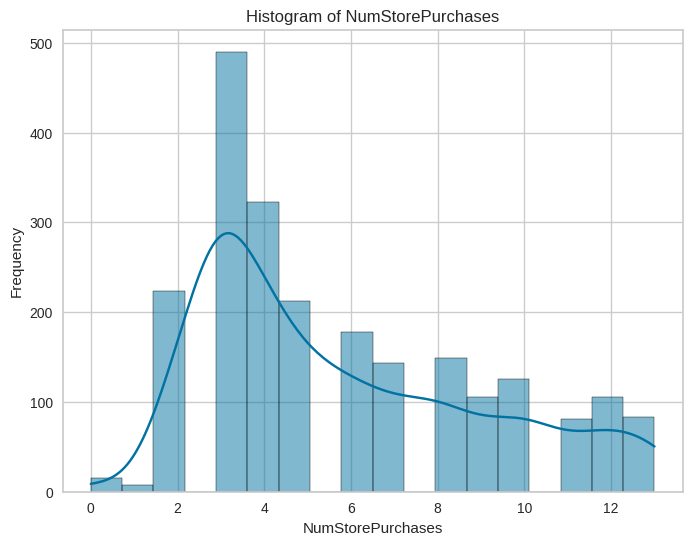

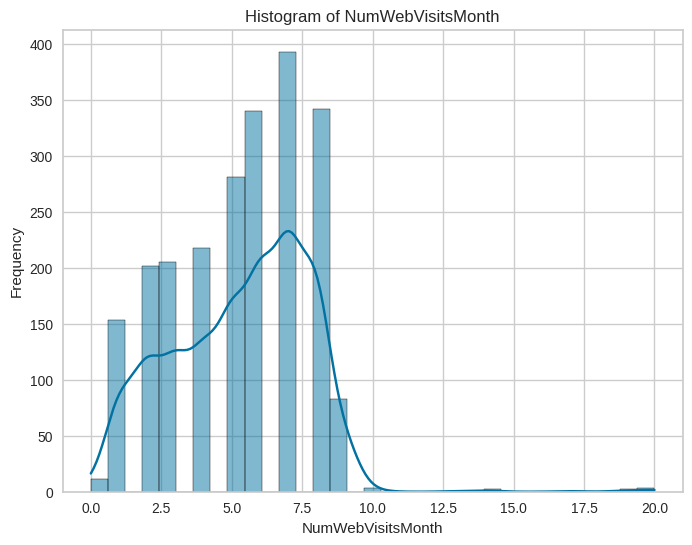

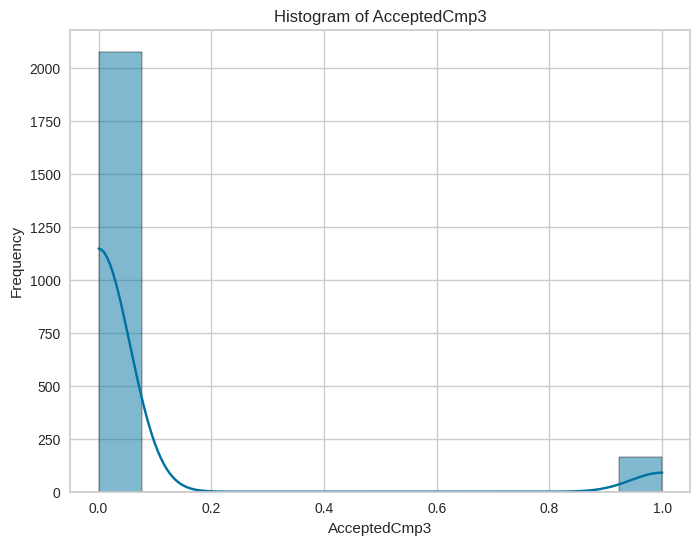

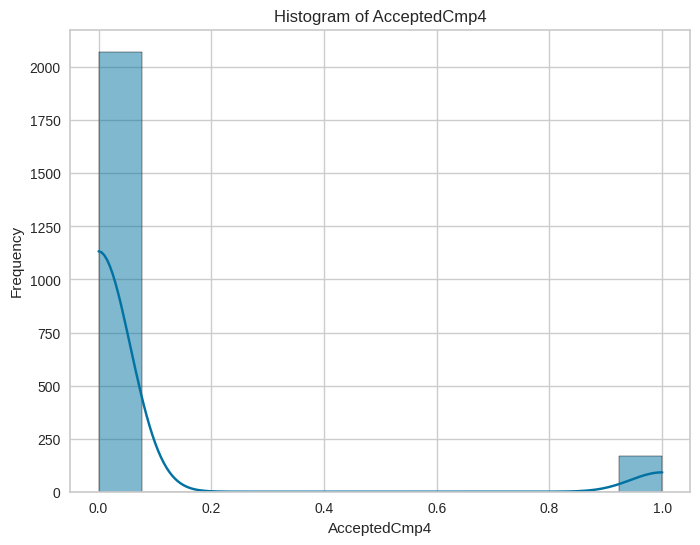

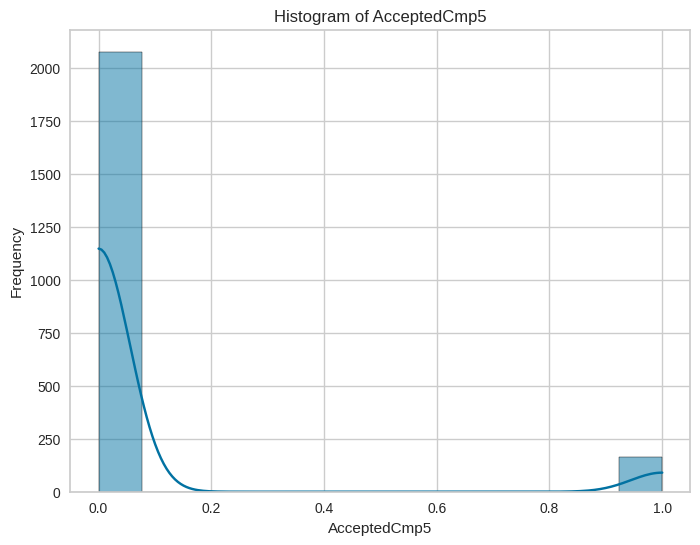

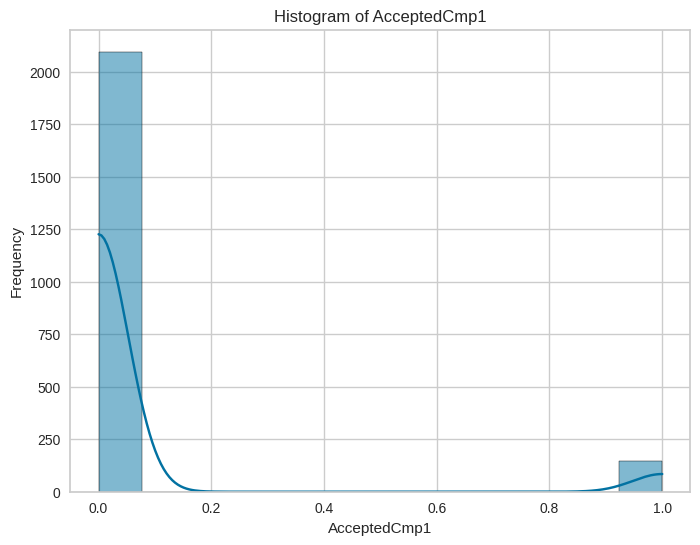

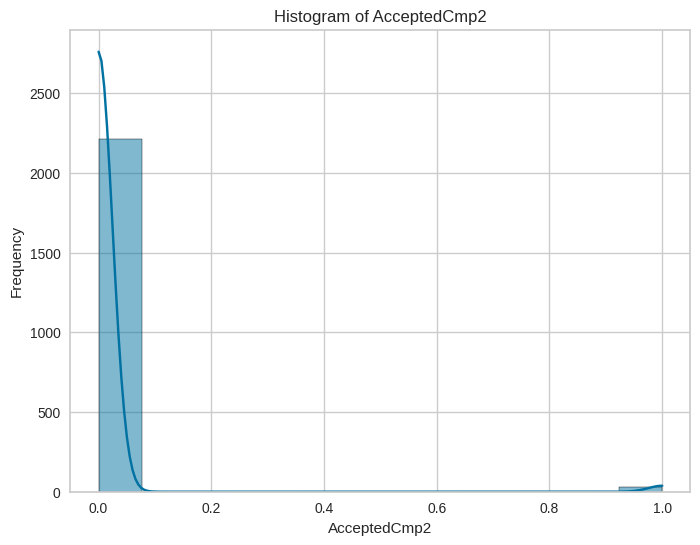

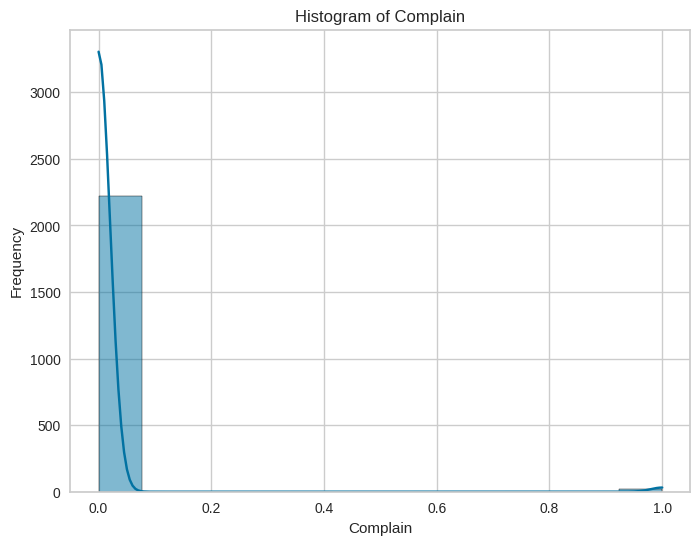

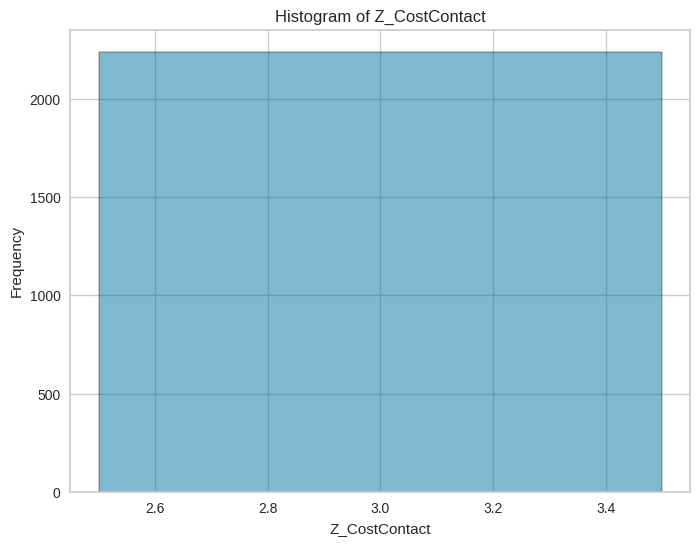

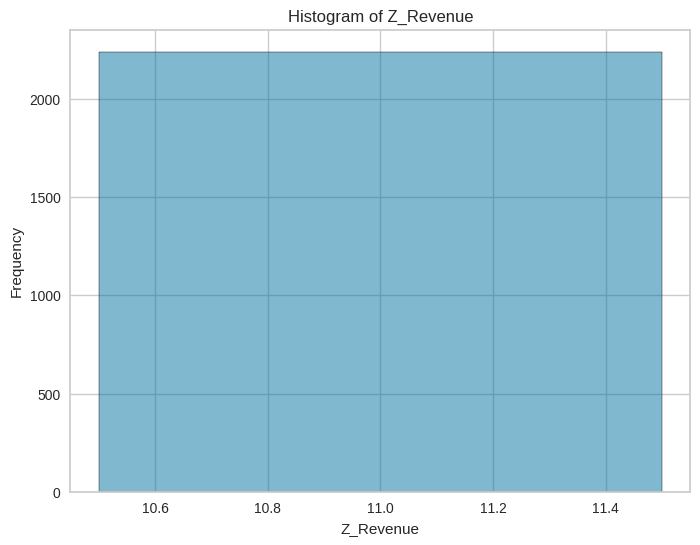

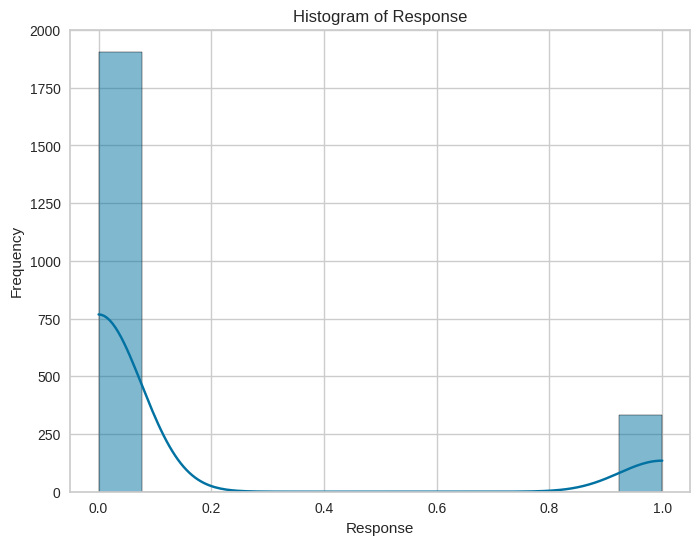

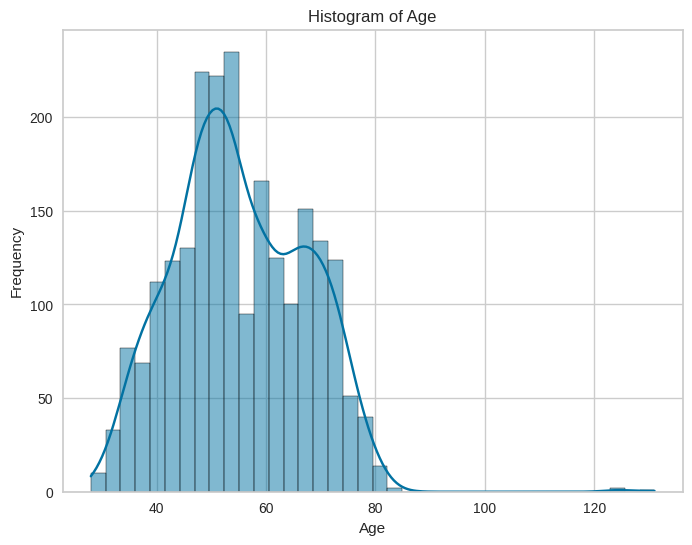

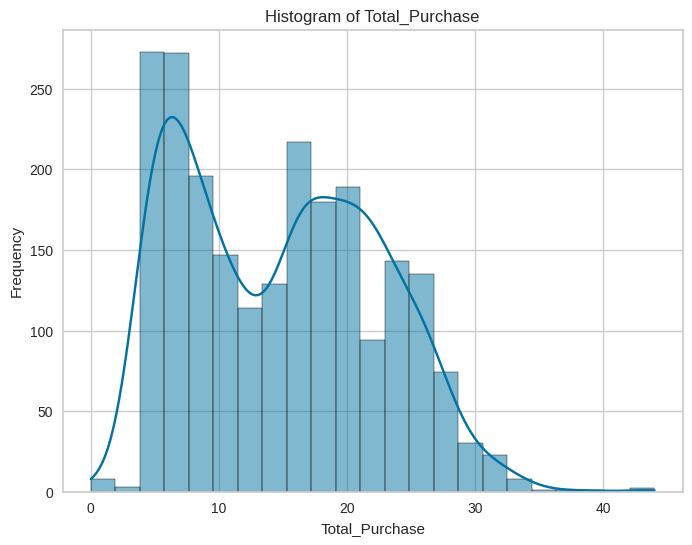

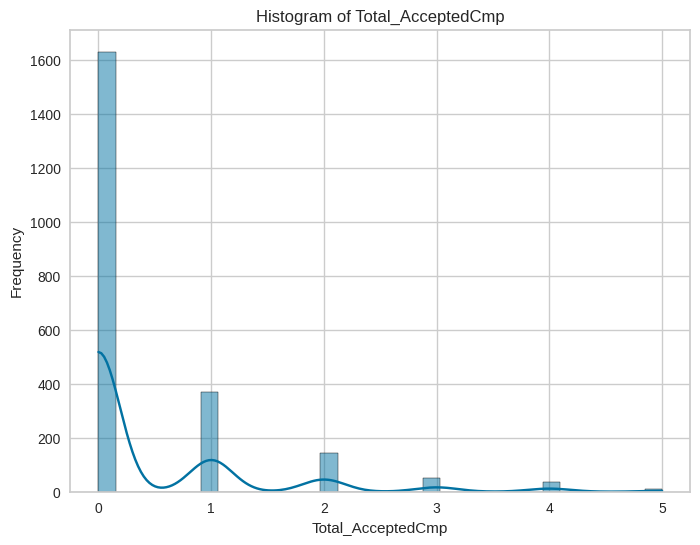

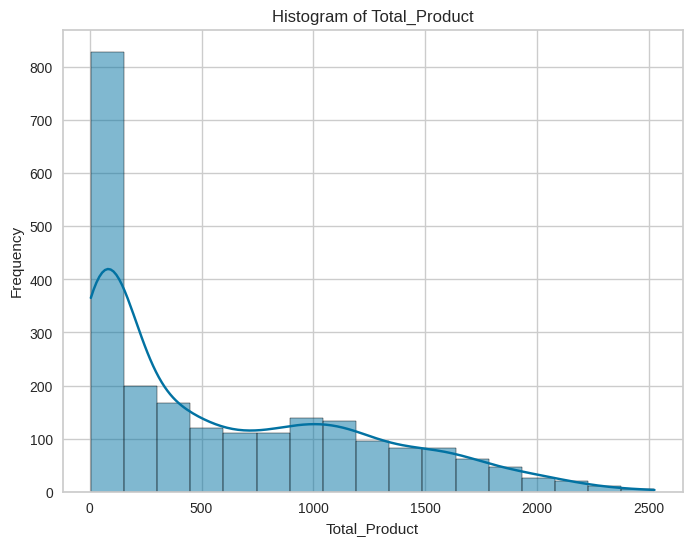

In [2414]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

<Axes: >

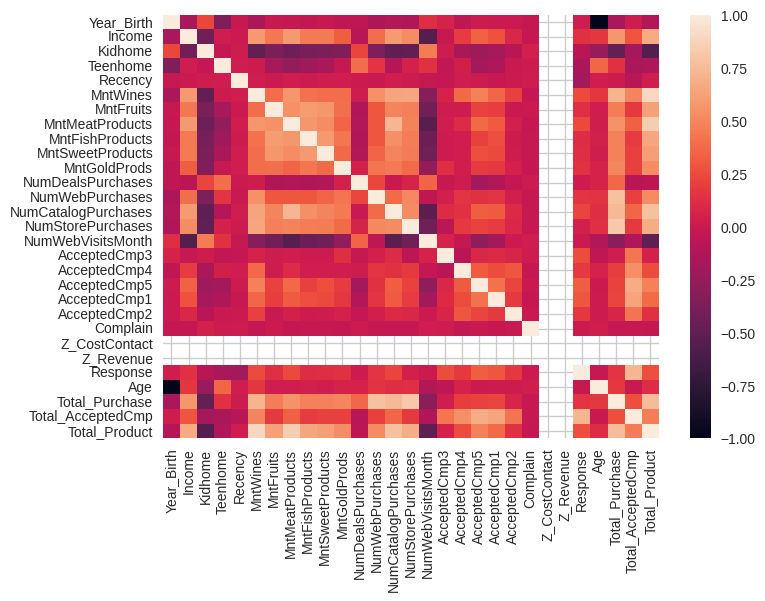

In [2415]:
sns.heatmap(df[numerical_features].corr(), annot=False)

In [2416]:
#Memuat ringkasan berdasarkan tingkat edukasi
byeducation = df.groupby('Education').agg({
    'ID': 'nunique',
    'Income': 'mean',
    'Total_Purchase' : 'mean'})
byeducation

,ID,Income,Total_Purchase
Education,,,
2n Cycle,203,47633.190000,13.802956
Basic,54,20306.259259,7.018519
Graduation,1127,52720.373656,14.990240
Master,370,52917.534247,14.927027
PhD,486,56145.313929,15.829218


<Axes: xlabel='Education', ylabel='ID'>

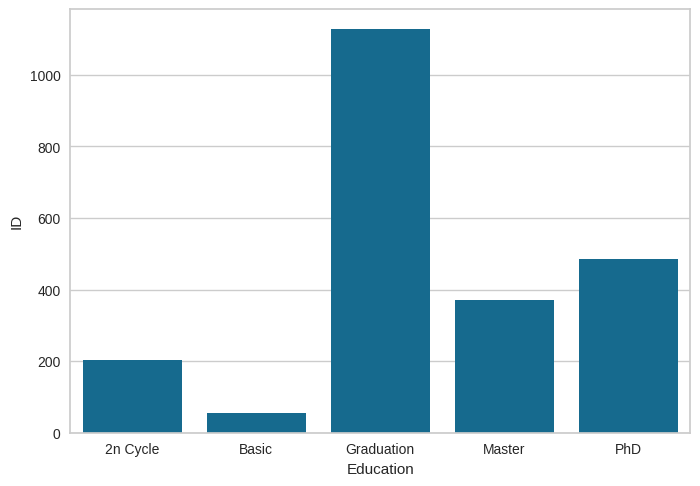

In [2417]:
sns.barplot(x=byeducation.index, y=byeducation['ID'])

In [2418]:
#Memuat ringkasan berdasarkan profesi
bymarital = df.groupby('Marital_Status').agg({
    'ID': 'nunique',
    'Income': 'mean',
    'Total_Purchase' : 'mean'})
bymarital

,ID,Income,Total_Purchase
Marital_Status,,,
Absurd,2,72365.500000,19.500000
Alone,3,43789.000000,13.333333
Divorced,232,52834.228448,15.237069
Married,864,51724.978996,14.956019
Single,480,50995.350318,14.243750
Together,580,53245.534031,14.817241
Widow,77,56481.552632,16.701299
YOLO,2,48432.000000,19.000000


<Axes: xlabel='Marital_Status', ylabel='ID'>

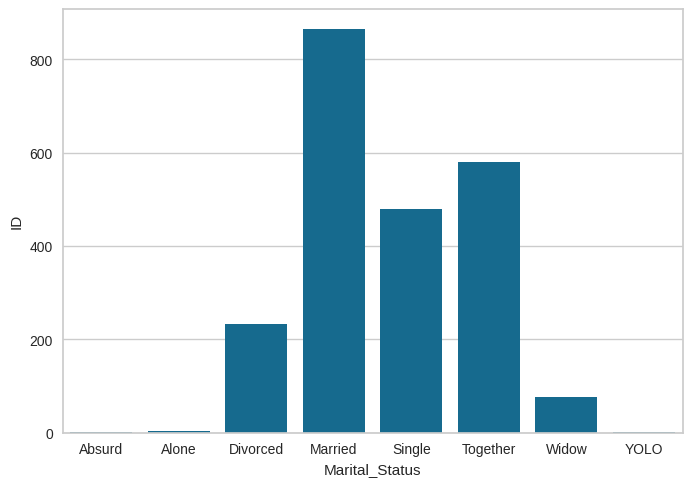

In [2419]:
sns.barplot(x=bymarital.index, y=bymarital['ID'])

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [2420]:
df['Income'].fillna(df['Income'].mean(),inplace=True) #Melakukan pengisian data hilang dengan kategori yang paling sering muncul

<ipython-input-2420-6996b1493641>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(),inplace=True) #Melakukan pengisian data hilang dengan kategori yang paling sering muncul


In [2421]:
df['Income'].isna().sum()

0

In [2422]:
df.drop_duplicates(inplace=True) #Menghapus data duplikat

In [2423]:
df["ID"].nunique() #Mengecek apabila terdapat data dengan ID yng sama

2240

In [2424]:
df = df[df['Age'] < 100].reset_index(drop=True)#Menghapus data dengan umur lebih dari 100 tahun

In [2425]:
df['Income'].replace(df['Income'].max(), df['Income'].mean(), inplace=True)

<ipython-input-2425-f4bd0787ba39>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].replace(df['Income'].max(), df['Income'].mean(), inplace=True)


In [2426]:
#Mengubah beberapa kategori dengan frekuensi yang relatif sedikit untuk menyederhanakan data
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'In Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [2427]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

In [2428]:
df['Education'] = df['Education'].replace(['Basic','Graduation'],'Undergraduate')
df['Education'] = df['Education'].replace(['2n Cycle','Master'],'Graduate')
df['Education'] = df['Education'].replace(['PhD'],'Post Graduate')

In [2429]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
latest_date = df['Dt_Customer'].max()
df['Days'] = (latest_date - df['Dt_Customer']).dt.days

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Purchase,Total_AcceptedCmp,Total_Product,Kids,Days
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,67,25,1,1617,0,663
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,70,6,0,27,2,113
2,4141,1965,Undergraduate,In Relationship,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,59,21,0,776,0,312
3,6182,1984,Undergraduate,In Relationship,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,40,8,0,53,1,139
4,5324,1981,Post Graduate,In Relationship,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,43,19,0,422,1,161


In [2430]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Purchase,Total_AcceptedCmp,Total_Product,Kids,Days
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.0,2237.0,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,51962.029382,0.444345,0.506482,2013-07-10 05:01:54.260169728,49.104604,303.995530,26.270451,166.916853,...,0.008941,3.0,11.0,0.149307,55.098346,14.870809,0.447027,605.743406,0.950827,353.790344
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,28.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,2829.000000,1959.000000,35523.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,...,0.000000,3.0,11.0,0.000000,47.000000,8.000000,0.000000,69.000000,0.000000,181.000000
50%,5455.000000,1970.000000,51717.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,174.000000,8.000000,67.000000,...,0.000000,3.0,11.0,0.000000,54.000000,15.000000,0.000000,396.000000,1.000000,356.000000
75%,8427.000000,1977.000000,68274.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,504.000000,33.000000,232.000000,...,0.000000,3.0,11.0,0.000000,65.000000,21.000000,1.000000,1045.000000,1.000000,529.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,3.0,11.0,1.000000,84.000000,44.000000,5.000000,2525.000000,3.000000,699.000000
std,3245.118591,11.701917,21406.617183,0.538467,0.544593,NaN,28.956073,336.574382,39.715972,225.661158,...,0.094152,0.0,0.0,0.356471,11.701917,7.676593,0.890964,601.840466,0.752037,202.137961


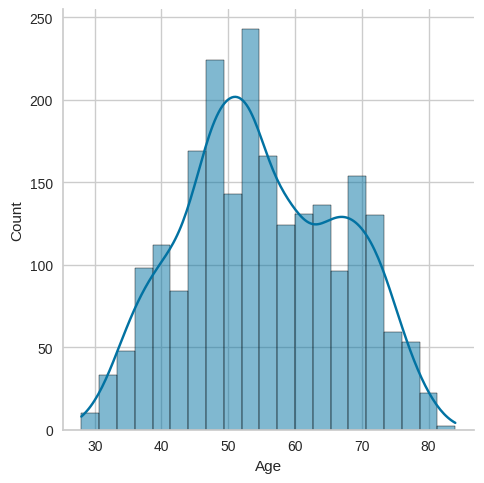

In [2431]:
sns.displot(df, x="Age", kde=True)
plt.show()

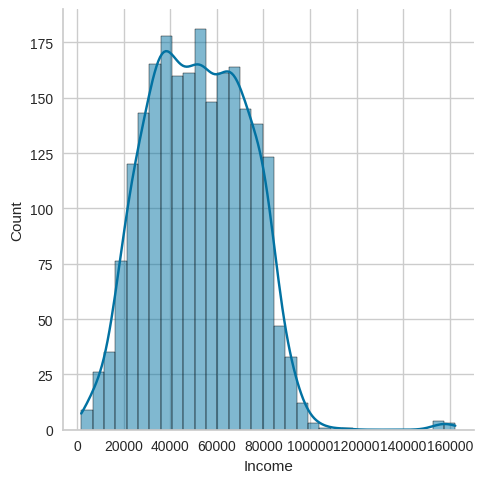

In [2432]:
sns.displot(df, x="Income", kde=True)
plt.show()

<Axes: ylabel='Income'>

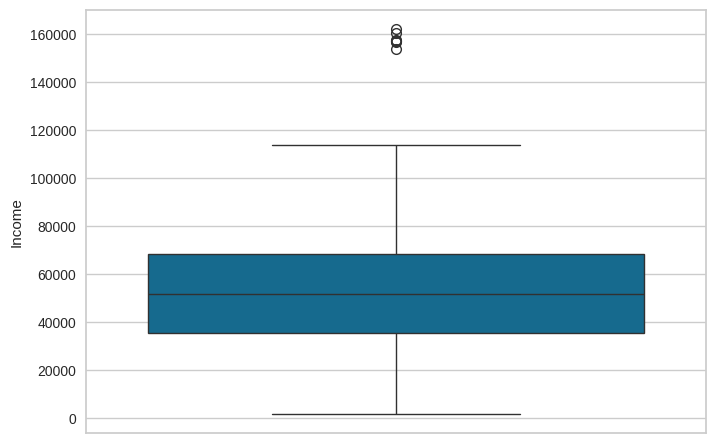

In [2433]:
sns.boxplot(df['Income'])

In [2434]:
#Melakukan encoding pada data kategorikal
encoder = OneHotEncoder()
categorical_features = df.select_dtypes(include=['object']).columns
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))
df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=categorical_features, inplace=True)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Total_Purchase,Total_AcceptedCmp,Total_Product,Kids,Days,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,25,1,1617,0,663,0.0,0.0,1.0,0.0,1.0
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,6,0,27,2,113,0.0,0.0,1.0,0.0,1.0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,21,0,776,0,312,0.0,0.0,1.0,1.0,0.0
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,8,0,53,1,139,0.0,0.0,1.0,1.0,0.0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,19,0,422,1,161,0.0,1.0,0.0,1.0,0.0


<Axes: >

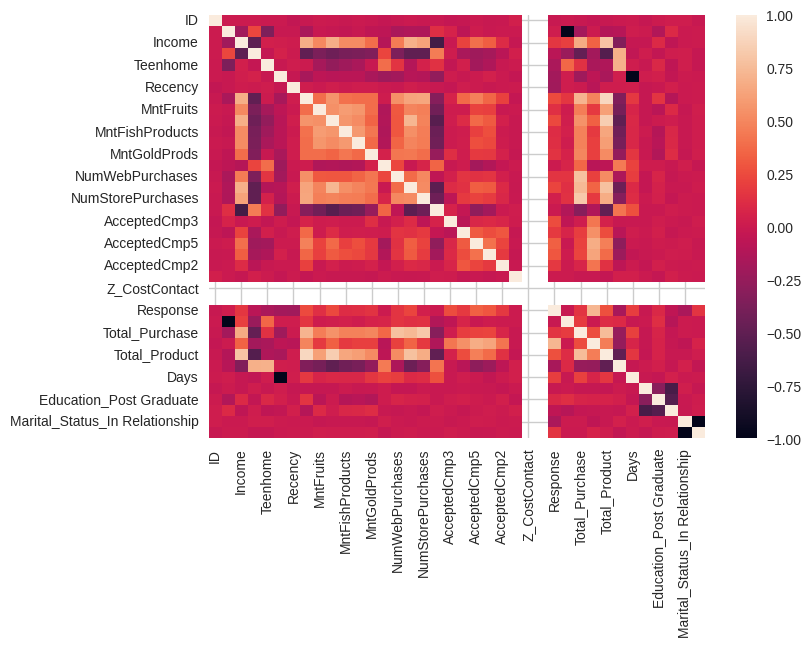

In [2435]:
sns.heatmap(df.corr(), annot=False)

In [2436]:
#Melakukan standarisasi pada data
scaler = StandardScaler()
df_2 = df.copy()
df_2.drop(columns=['ID','Dt_Customer'], inplace=True)
df_norm = scaler.fit_transform(df_2)
df_norm = pd.DataFrame(df_norm, columns=df_2.columns)
df_norm.head()



,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Total_Purchase,Total_AcceptedCmp,Total_Product,Kids,Days,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single
0,-1.017296,0.288572,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,...,1.319785,0.620785,1.680649,-1.264618,1.530038,-0.585438,-0.526143,0.945599,-1.348103,1.348103
1,-1.273722,-0.262502,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,...,-1.155824,-0.501847,-0.961838,1.395420,-1.191484,-0.585438,-0.526143,0.945599,-1.348103,1.348103
2,-0.333495,0.918191,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,...,0.798604,-0.501847,0.282956,-1.264618,-0.206788,-0.585438,-0.526143,0.945599,0.741783,-0.741783
3,1.290534,-1.182891,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,...,-0.895234,-0.501847,-0.918627,0.065401,-1.062830,-0.585438,-0.526143,0.945599,0.741783,-0.741783
4,1.034108,0.295814,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,...,0.538014,-0.501847,-0.305371,0.065401,-0.953970,-0.585438,1.900624,-1.057531,0.741783,-0.741783


In [2437]:
df_norm.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Total_Purchase,Total_AcceptedCmp,Total_Product,Kids,Days,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single
count,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,...,2237.000000,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03
mean,1.153004e-15,4.446848e-17,1.429344e-17,-9.528959e-17,1.195090e-16,6.352640e-17,-6.273232e-17,-5.240928e-17,5.796784e-17,-2.223424e-17,...,0.000000,-5.399744e-17,4.923296e-17,3.176320e-17,3.255728e-17,1.429344e-17,5.717376e-17,-7.940799e-17,-1.127594e-16,4.605664e-17
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,...,1.000224,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-2.470374e+00,-2.347090e+00,-8.253884e-01,-9.302273e-01,-1.696210e+00,-9.034065e-01,-6.616060e-01,-7.398445e-01,-6.868864e-01,-6.556625e-01,...,-1.937596,-5.018468e-01,-9.984003e-01,-1.264618e+00,-1.750633e+00,-5.854375e-01,-5.261430e-01,-1.057531e+00,-1.348103e+00,-7.417834e-01
25%,-8.463457e-01,-7.681132e-01,-8.253884e-01,-9.302273e-01,-8.671831e-01,-8.320839e-01,-6.364216e-01,-6.689259e-01,-6.319692e-01,-6.314405e-01,...,-0.895234,-5.018468e-01,-8.920361e-01,-1.264618e+00,-8.550051e-01,-5.854375e-01,-5.261430e-01,-1.057531e+00,-1.348103e+00,-7.417834e-01
50%,9.388133e-02,-1.144899e-02,-8.253884e-01,-9.302273e-01,-3.613327e-03,-3.863176e-01,-4.601307e-01,-4.428728e-01,-4.672176e-01,-4.618862e-01,...,0.016833,-5.018468e-01,-3.485813e-01,6.540104e-02,1.093387e-02,-5.854375e-01,-5.261430e-01,9.455990e-01,7.417834e-01,-7.417834e-01
75%,6.922077e-01,7.621764e-01,1.032151e+00,9.064174e-01,8.599565e-01,5.943684e-01,1.694798e-01,2.884754e-01,2.284002e-01,1.436647e-01,...,0.798604,6.207845e-01,7.300187e-01,6.540104e-02,8.669763e-01,1.708124e+00,-5.261430e-01,9.455990e-01,7.417834e-01,1.348103e+00
max,2.316236e+00,5.160071e+00,2.889690e+00,2.743062e+00,1.723526e+00,3.533455e+00,4.350093e+00,6.906069e+00,4.054298e+00,5.714733e+00,...,3.795395,5.111310e+00,3.189692e+00,2.725440e+00,1.708174e+00,1.708124e+00,1.900624e+00,9.455990e-01,7.417834e-01,1.348103e+00


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

CLustering akan dilakukan dengan menggunakan K-Means Clustering

In [2438]:
df_norm.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Purchase', 'Total_AcceptedCmp', 'Total_Product', 'Kids',
       'Days', 'Education_Graduate', 'Education_Post Graduate',
       'Education_Undergraduate', 'Marital_Status_In Relationship',
       'Marital_Status_Single'],
      dtype='object')

In [2439]:
#Mempersiapkan data
data = df_norm[[ 'Income', 'Recency', 'Complain',
       'Age', 'Total_Purchase', 'Total_AcceptedCmp', 'Total_Product', 'Kids',
       'Days', 'Education_Graduate', 'Education_Post Graduate',
       'Education_Undergraduate', 'Marital_Status_In Relationship',
       'Marital_Status_Single']]
data.head()
X=data.copy()
X.head()

,Income,Recency,Complain,Age,Total_Purchase,Total_AcceptedCmp,Total_Product,Kids,Days,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single
0,0.288572,0.307272,-0.09498,1.017296,1.319785,0.620785,1.680649,-1.264618,1.530038,-0.585438,-0.526143,0.945599,-1.348103,1.348103
1,-0.262502,-0.383584,-0.09498,1.273722,-1.155824,-0.501847,-0.961838,1.395420,-1.191484,-0.585438,-0.526143,0.945599,-1.348103,1.348103
2,0.918191,-0.798098,-0.09498,0.333495,0.798604,-0.501847,0.282956,-1.264618,-0.206788,-0.585438,-0.526143,0.945599,0.741783,-0.741783
3,-1.182891,-0.798098,-0.09498,-1.290534,-0.895234,-0.501847,-0.918627,0.065401,-1.062830,-0.585438,-0.526143,0.945599,0.741783,-0.741783
4,0.295814,1.550812,-0.09498,-1.034108,0.538014,-0.501847,-0.305371,0.065401,-0.953970,-0.585438,1.900624,-1.057531,0.741783,-0.741783


In [2440]:
X = X.to_numpy()

In [2441]:
X[0]

array([ 0.28857205,  0.30727179, -0.09498   ,  1.01729612,  1.31978541,
        0.6207845 ,  1.6806492 , -1.26461829,  1.53003815, -0.58543752,
       -0.52614303,  0.94559901, -1.3481025 ,  1.3481025 ])

In [2442]:
# Fungsi untuk analisis karakteristik cluster
def clustering(X, k):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    return kmeans, labels

kmeans_2 , labels_2 = clustering(X,2)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

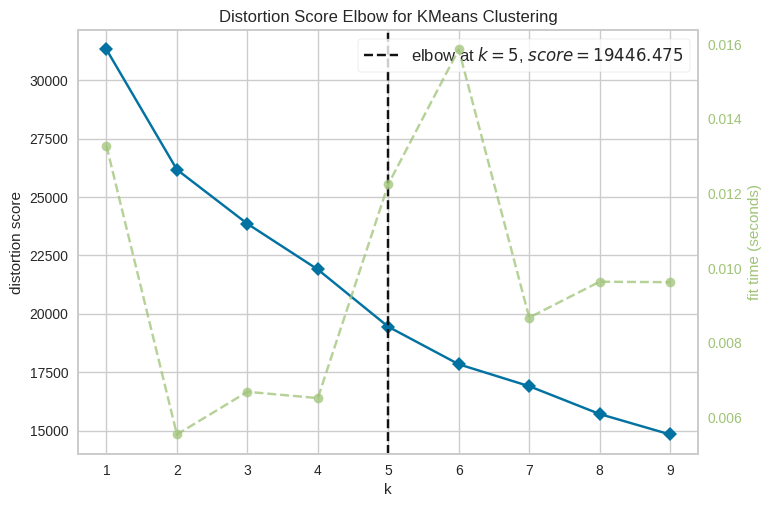

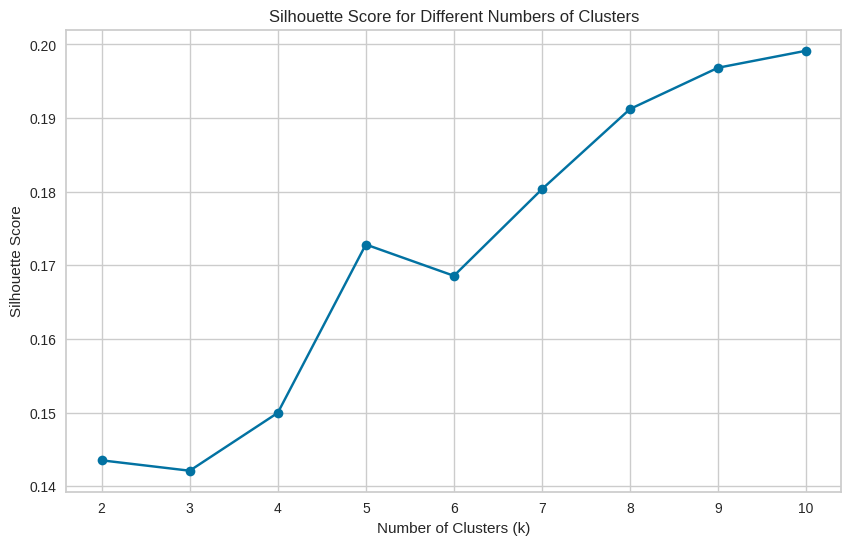

In [2443]:
def elbow_method(X):
  kmeans = KMeans()

  # Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
  visualizer = KElbowVisualizer(kmeans, k=(1, 10))

  # Fit visualizer dengan data untuk menemukan jumlah cluster optimal
  visualizer.fit(X)

  # Menampilkan grafik elbow untuk analisis
  visualizer.show()

  return

def silhouette_method(X):
  sil_scores = []

# Try different k values (number of clusters)
  k_range = range(2, 11)  # We start from 2 because silhouette score is not defined for 1 cluster

  for k in k_range:
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(X)
      labels = kmeans.labels_  # Get the cluster labels
      sil_score = silhouette_score(X, labels)  # Calculate silhouette score
      sil_scores.append(sil_score)

  # Plot Silhouette Scores for different k values
  plt.figure(figsize=(10, 6))
  plt.plot(k_range, sil_scores, marker='o')
  plt.title('Silhouette Score for Different Numbers of Clusters')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.show()

  return

elbow_method(X)
silhouette_method(X)

In [2444]:
silhouette_2 = silhouette_score(X, labels_2) #dengan k = 2
silhouette_2

0.14351848719517696

In [2445]:
kmeans_5 , labels_5 = clustering(X,5)

In [2446]:
silhouette_5 = silhouette_score(X, labels_5) #dengan k = 5
silhouette_5

0.17282917783948645

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [2447]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [2448]:
X_reduced

array([[ 2.58573903,  1.92272137],
       [-1.71723708,  2.04317408],
       [ 1.11216193, -0.97247552],
       ...,
       [ 1.36623871,  2.07058055],
       [ 0.87165659, -1.4934876 ],
       [-0.4178759 , -1.15476292]])

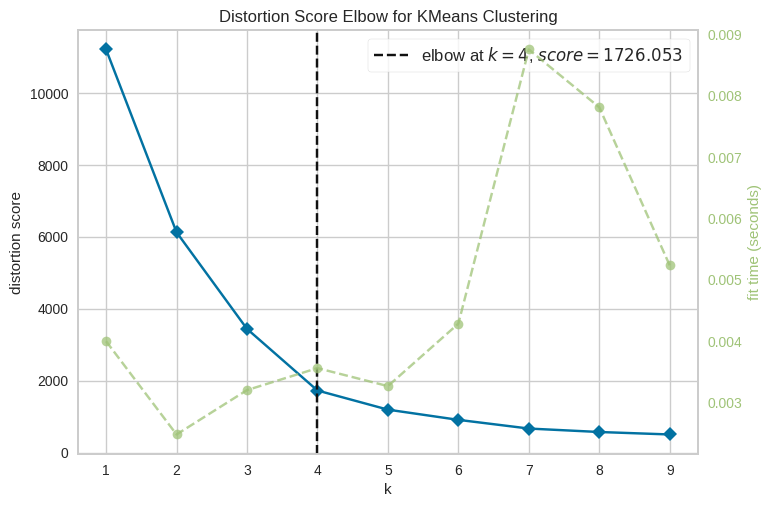

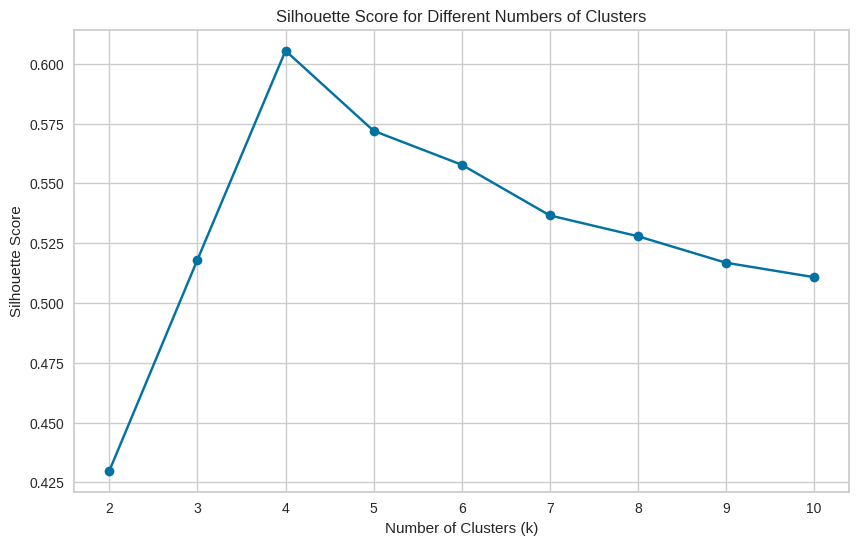

In [2449]:
elbow_method(X_reduced)
silhouette_method(X_reduced)

In [2450]:
kmeans_pca_4, labels_pca_4 = clustering(X_reduced,4)

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters_pca(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_pc1 = cluster_data[:, 0].mean()
        mean_pc2 = cluster_data[:, 1].mean()



        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata PC1: {mean_pc1:.2f}")
        print(f"Rata-rata PC2: {mean_pc2:.2f}")

analyze_clusters_pca(X_reduced, labels_pca_4, 4)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata PC1: -1.40
Rata-rata PC2: -0.95

Cluster 2:
Rata-rata PC1: 1.61
Rata-rata PC2: -1.15

Cluster 3:
Rata-rata PC1: 1.84
Rata-rata PC2: 1.78

Cluster 4:
Rata-rata PC1: -1.24
Rata-rata PC2: 1.97


In [2451]:
silhouette_pca_4 = silhouette_score(X_reduced, labels_pca_4) #dengan k = 4
silhouette_pca_4

0.6054607641492098

In [2452]:
data.columns

Index(['Income', 'Recency', 'Complain', 'Age', 'Total_Purchase',
       'Total_AcceptedCmp', 'Total_Product', 'Kids', 'Days',
       'Education_Graduate', 'Education_Post Graduate',
       'Education_Undergraduate', 'Marital_Status_In Relationship',
       'Marital_Status_Single'],
      dtype='object')

In [2453]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],index=[ 'Income', 'Recency', 'Complain', 'Age', 'Total_Purchase',
       'Total_AcceptedCmp', 'Total_Product', 'Kids', 'Days',
       'Education_Graduate', 'Education_Post Graduate',
       'Education_Undergraduate', 'Marital_Status_In Relationship',
       'Marital_Status_Single'])
print(loadings)

                                     PC1       PC2
Income                          0.495563 -0.052582
Recency                        -0.006196  0.005321
Complain                       -0.027572  0.005576
Age                             0.112725 -0.042863
Total_Purchase                  0.472972 -0.059773
Total_AcceptedCmp               0.318276  0.040317
Total_Product                   0.542790 -0.032876
Kids                           -0.313829 -0.024756
Days                            0.097650  0.006465
Education_Graduate             -0.025374 -0.094642
Education_Post Graduate         0.081909 -0.030696
Education_Undergraduate        -0.045449  0.107995
Marital_Status_In Relationship -0.043853 -0.695285
Marital_Status_Single           0.043853  0.695285


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

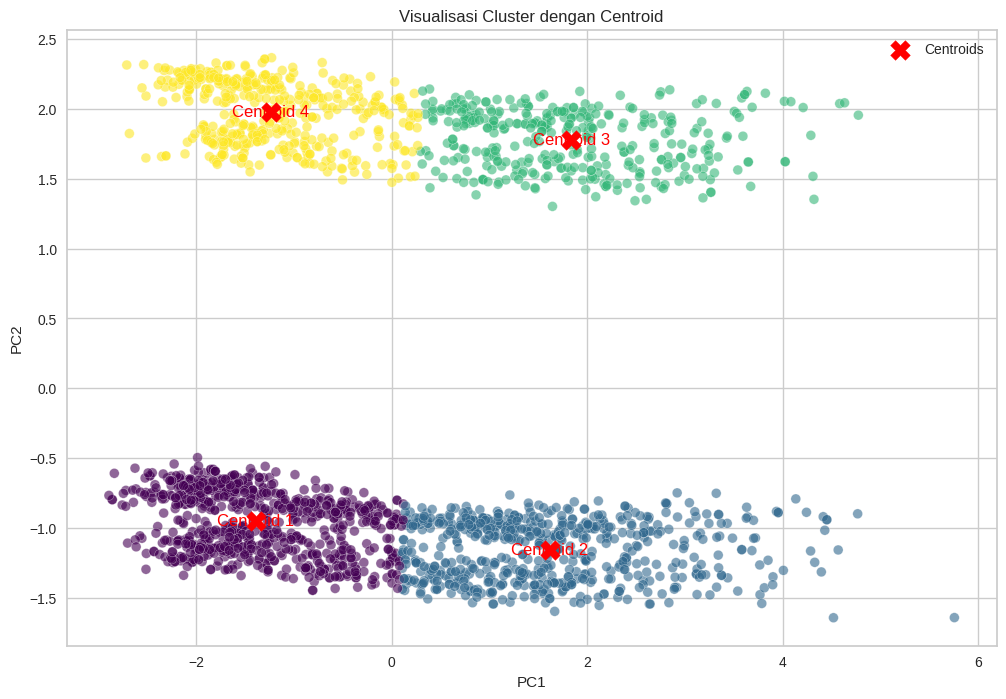

Nilai Centroids:
Centroid 1: PC1 = -1.3881, PC2 = -0.9485
Centroid 2: PC1 = 1.6153, PC2 = -1.1540
Centroid 3: PC1 = 1.8386, PC2 = 1.7780
Centroid 4: PC1 = -1.2359, PC2 = 1.9748


In [2454]:
# Menentukan posisi centroid
centroids = kmeans_pca_4.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_pca_4, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: PC1 = {centroid[0]:.4f}, PC2 = {centroid[1]:.4f}")

In [2455]:
print(pca.explained_variance_ratio_)

[0.21441015 0.14359472]


In [2456]:
df_clustered = df.copy()
df_clustered['Cluster'] = labels_pca_4
df_clustered.head()
df_clustered.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Total_AcceptedCmp,Total_Product,Kids,Days,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single,Cluster
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,1,1617,0,663,0.0,0.0,1.0,0.0,1.0,2
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,27,2,113,0.0,0.0,1.0,0.0,1.0,3
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,776,0,312,0.0,0.0,1.0,1.0,0.0,1
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,53,1,139,0.0,0.0,1.0,1.0,0.0,0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,422,1,161,0.0,1.0,0.0,1.0,0.0,0


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [2457]:
print(loadings)

                                     PC1       PC2
Income                          0.495563 -0.052582
Recency                        -0.006196  0.005321
Complain                       -0.027572  0.005576
Age                             0.112725 -0.042863
Total_Purchase                  0.472972 -0.059773
Total_AcceptedCmp               0.318276  0.040317
Total_Product                   0.542790 -0.032876
Kids                           -0.313829 -0.024756
Days                            0.097650  0.006465
Education_Graduate             -0.025374 -0.094642
Education_Post Graduate         0.081909 -0.030696
Education_Undergraduate        -0.045449  0.107995
Marital_Status_In Relationship -0.043853 -0.695285
Marital_Status_Single           0.043853  0.695285


Terlihat bahwa PC1 dipengaruhi secara positif oleh Income, Total Purchase, Total Accepted Campaign, Total Product Purchased dan dipengaruhi secara negatif oleh Kids. Oleh karena itu, PC1 dapat menggambarkan pola customer dalam melakukan pembelian produk.

Sementara itu, PC2 dipengaruhi secara signifikan oleh Martial Status. Oleh karena itu, PC2 menggambarkan status pernikahan customer.

Dengan nilai centroid untuk setiap clusternya:

Centroid 1: PC1 = -1.3881, PC2 = -0.9485

Centroid 2: PC1 = 1.6153, PC2 = -1.1540

Centroid 3: PC1 = 1.8386, PC2 = 1.7780

Centroid 4: PC1 = -1.2359, PC2 = 1.9748

In [2458]:
df_clustered.groupby('Cluster').agg({
    'Income': 'mean',
    'Total_Purchase': 'mean',
    'Total_AcceptedCmp': 'mean',
    'Total_Product': 'mean',
    'Kids': 'mean',
    'Marital_Status_In Relationship': 'mean',
    'Marital_Status_Single': 'mean'
})

,Income,Total_Purchase,Total_AcceptedCmp,Total_Product,Kids,Marital_Status_In Relationship,Marital_Status_Single
Cluster,,,,,,,
0,37520.325042,9.653236,0.150183,158.565324,1.249084,1.0,0.0
1,70740.948727,21.786859,0.743590,1172.435897,0.610577,1.0,0.0
2,69845.396586,21.210959,0.893151,1180.947945,0.493151,0.0,1.0
3,37002.311794,9.377622,0.202797,145.773893,1.265734,0.0,1.0


Karakteristik customer bedasarkan cluster yang terbentuk adalah sebagai berikut:


*   Cluster 1 : Memiliki rata - rata Income yang tergolong rendah dengan total pembelian dan penerimaan campaign yang cukup rendah dengan status pernikahan dalam sebuah hubungan dan memiliki anak setidaknya 1 orang.

*   Cluster 2 : Memiliki rata - rata Income yang tertinggi dengan total pembelian dan penerimaan campaign yang cukup tinggi dengan status pernikahan  dalam sebuah hubungan dan berkemungkinan besar memiliki 1 anak atau tidak memiliki anak.

* Cluster 3 : Memiliki rata - rata Income yang tergolong tinggi dengan total pembelian yang sedikit lebih rendah dan penerimaan campaign yang sedikit lebih tinggi dari  cluster 2. Customer pada cluster ini memiliki status pernikahan tidak dalam sebuah hubungan dan berkemungkinan besar tidak memiliki anak.

* Cluster 4 :Memiliki rata - rata Income yang tergolong lebih rendah dari cluster 1 dengan total pembelian yang lebih rendah namun penerimaan campaign yang sedikti lebih tinggi. Customer pada cluster ini memiliki status pernikahan tidak dalam sebuah hubungan namun memiliki anak setidaknya 1 orang.

Dari keempat cluster yang terbentuk, sebuah campaign dapat diberikan dengan memperhatikan total purchase, total product, dan kondisi keluarga yang dilihat dari banyak anak dan status pernikahan. Pada cluster 1 dan 4 dapat memberikan diskon pembelian atau menawarkan produk-produk kebutuhan keluarga untuk meningkatkan total purchased pada kedua cluster.


In [2459]:
#Cluster berdasar data customer
df_clustered.groupby('Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Kids': 'mean',
    'Teenhome': 'mean',
    'Kidhome': 'mean',
    'Education_Graduate': 'mean',
    'Education_Post Graduate': 'mean',
    'Education_Undergraduate': 'mean',
    'Marital_Status_In Relationship': 'mean',
    'Marital_Status_Single': 'mean'
})

,Age,Income,Kids,Teenhome,Kidhome,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single
Cluster,,,,,,,,,,
0,53.313797,37520.325042,1.249084,0.542125,0.706960,0.285714,0.169719,0.544567,1.0,0.0
1,57.463141,70740.948727,0.610577,0.488782,0.121795,0.237179,0.270833,0.491987,1.0,0.0
2,56.939726,69845.396586,0.493151,0.432877,0.060274,0.227397,0.263014,0.509589,0.0,1.0
3,53.498834,37002.311794,1.265734,0.526807,0.738928,0.247086,0.188811,0.564103,0.0,1.0


In [2460]:
#Cluster berdasar karakteristik belanja customer
df_clustered.groupby('Cluster').agg({
    'Recency': 'mean',
    'Complain': 'mean',
    'Total_Purchase': 'mean',
    'Total_AcceptedCmp': 'mean',
    'Total_Product': 'mean',
})

,Recency,Complain,Total_Purchase,Total_AcceptedCmp,Total_Product
Cluster,,,,,
0,49.424908,0.010989,9.653236,0.150183,158.565324
1,48.491987,0.006410,21.786859,0.743590,1172.435897
2,50.027397,0.005479,21.210959,0.893151,1180.947945
3,48.599068,0.011655,9.377622,0.202797,145.773893


In [2461]:
df_clustered.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Total_Purchase', 'Total_AcceptedCmp', 'Total_Product', 'Kids', 'Days',
       'Education_Graduate', 'Education_Post Graduate',
       'Education_Undergraduate', 'Marital_Status_In Relationship',
       'Marital_Status_Single', 'Cluster'],
      dtype='object')

In [2462]:
#Cluster berdasar produk
df_clustered.groupby('Cluster').agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
})

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Cluster,,,,,,
0,77.229548,7.233211,34.153846,10.743590,7.091575,22.113553
1,597.282051,49.471154,333.004808,70.963141,51.841346,69.873397
2,589.246575,52.030137,337.635616,73.649315,53.268493,75.117808
3,67.617716,6.951049,33.540793,9.270396,6.883450,21.510490


In [2463]:
#Cluster berdasar tempat pembelian
df_clustered.groupby('Cluster').agg({
    'NumWebPurchases': 'mean',
    'NumCatalogPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumDealsPurchases': 'mean'
})

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases
Cluster,,,,
0,2.724054,0.793651,3.785104,2.350427
1,5.871795,5.070513,8.458333,2.386218
2,5.750685,4.980822,8.358904,2.120548
3,2.678322,0.755245,3.573427,2.370629


In [2464]:
#Cluster berdasar campaign
df_clustered.groupby('Cluster').agg({
    'AcceptedCmp1': 'mean',
    'AcceptedCmp2': 'mean',
    'AcceptedCmp3': 'mean',
    'AcceptedCmp4': 'mean',
    'AcceptedCmp5': 'mean',
    'Response': 'mean'
})

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Cluster,,,,,,
0,0.002442,0.002442,0.058608,0.020757,0.000000,0.065934
1,0.149038,0.027244,0.083333,0.142628,0.174679,0.166667
2,0.131507,0.030137,0.084932,0.164384,0.145205,0.336986
3,0.002331,0.000000,0.074592,0.002331,0.000000,0.123543


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [2465]:
data_clustered = df_norm.copy()
data_clustered['Cluster'] = labels_pca_4
data_clustered.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Total_AcceptedCmp,Total_Product,Kids,Days,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single,Cluster
0,-1.017296,0.288572,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,...,0.620785,1.680649,-1.264618,1.530038,-0.585438,-0.526143,0.945599,-1.348103,1.348103,2
1,-1.273722,-0.262502,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,...,-0.501847,-0.961838,1.395420,-1.191484,-0.585438,-0.526143,0.945599,-1.348103,1.348103,3
2,-0.333495,0.918191,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,...,-0.501847,0.282956,-1.264618,-0.206788,-0.585438,-0.526143,0.945599,0.741783,-0.741783,1
3,1.290534,-1.182891,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,...,-0.501847,-0.918627,0.065401,-1.062830,-0.585438,-0.526143,0.945599,0.741783,-0.741783,0
4,1.034108,0.295814,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,...,-0.501847,-0.305371,0.065401,-0.953970,-0.585438,1.900624,-1.057531,0.741783,-0.741783,0


In [2466]:
data_clustered.to_csv('/content/gdrive/MyDrive/IDCAMP/hasil_clustering.csv', index=False)